# Integrantes: YO solito

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
import pydotplus
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, ConfusionMatrixDisplay
from sklearn import tree

In [33]:
#data = pd.read_orc("CreditCardPromotion.arff")
df = arff.loadarff("CreditCardPromotion.arff")
data = pd.DataFrame(df[0])
data

,IncomeRange,MagazinePromo,WatchPromo,LifeInsPromo,CreditCardIns,Gender,Age
0,b'40-50000',b'Yes',b'No',b'No',b'No',b'Male',45.0
1,b'30-40000',b'Yes',b'Yes',b'Yes',b'No',b'Female',40.0
2,b'40-50000',b'No',b'No',b'No',b'No',b'Male',42.0
3,b'30-40000',b'Yes',b'Yes',b'Yes',b'Yes',b'Male',43.0
4,b'50-60000',b'Yes',b'No',b'Yes',b'No',b'Female',38.0
5,b'20-30000',b'No',b'No',b'No',b'No',b'Female',55.0
6,b'30-40000',b'Yes',b'No',b'Yes',b'Yes',b'Male',35.0
7,b'20-30000',b'No',b'Yes',b'No',b'No',b'Male',27.0
8,b'30-40000',b'Yes',b'No',b'No',b'No',b'Male',43.0
9,b'30-40000',b'Yes',b'Yes',b'Yes',b'No',b'Female',41.0


In [34]:
def bytes_to_str(value):
    if isinstance(value, bytes):
        return value.decode('utf-8')  # Convertir de bytes a cadena
    return value

# Aplicar la función a todo el DataFrame
data = data.applymap(bytes_to_str)
data

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27360\1772685953.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(bytes_to_str)


,IncomeRange,MagazinePromo,WatchPromo,LifeInsPromo,CreditCardIns,Gender,Age
0,40-50000,Yes,No,No,No,Male,45.0
1,30-40000,Yes,Yes,Yes,No,Female,40.0
2,40-50000,No,No,No,No,Male,42.0
3,30-40000,Yes,Yes,Yes,Yes,Male,43.0
4,50-60000,Yes,No,Yes,No,Female,38.0
5,20-30000,No,No,No,No,Female,55.0
6,30-40000,Yes,No,Yes,Yes,Male,35.0
7,20-30000,No,Yes,No,No,Male,27.0
8,30-40000,Yes,No,No,No,Male,43.0
9,30-40000,Yes,Yes,Yes,No,Female,41.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IncomeRange    15 non-null     object 
 1   MagazinePromo  15 non-null     object 
 2   WatchPromo     15 non-null     object 
 3   LifeInsPromo   15 non-null     object 
 4   CreditCardIns  15 non-null     object 
 5   Gender         15 non-null     object 
 6   Age            15 non-null     float64
dtypes: float64(1), object(6)
memory usage: 972.0+ bytes


In [36]:
data.IncomeRange.value_counts()

IncomeRange
30-40000    5
40-50000    4
20-30000    4
50-60000    2
Name: count, dtype: int64

Revisamos los valores perdidos

In [37]:
atributos = ["IncomeRange","MagazinePromo","WatchPromo","LifeInsPromo","CreditCardIns","Gender","Age"]
for col in atributos:
    x = data[col].isna().sum()
    if x > 0:
        print(col, x)

In [38]:
data = data.drop(["MagazinePromo","WatchPromo"], axis=1)

In [39]:
data["IncomeRange"] = data["IncomeRange"].map({'20-30000':0,'30-40000':1,'40-50000':2 , '50-60000':3, })
data["CreditCardIns"] = data["CreditCardIns"].map({'No':0, 'Yes':1})
data["LifeInsPromo"] = data["LifeInsPromo"].map({'No':0, 'Yes':1})
data["Gender"] = data["Gender"].map({'Female':0, 'Male':1})
data



,IncomeRange,LifeInsPromo,CreditCardIns,Gender,Age
0,2,0,0,1,45.0
1,1,1,0,0,40.0
2,2,0,0,1,42.0
3,1,1,1,1,43.0
4,3,1,0,0,38.0
5,0,0,0,0,55.0
6,1,1,1,1,35.0
7,0,0,0,1,27.0
8,1,0,0,1,43.0
9,1,1,0,0,41.0


In [40]:
x = data[["IncomeRange","CreditCardIns","Gender","Age"]]
y = data[["LifeInsPromo"]]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Aplicamos el criterio de impuresa

In [42]:
modelo = DecisionTreeClassifier(criterion='gini', random_state=0)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

Sacamos el score y la matriz de confusion

In [43]:
y_pred = modelo.predict(x_test)
score = modelo.score(x_train, y_train)
score

1.0

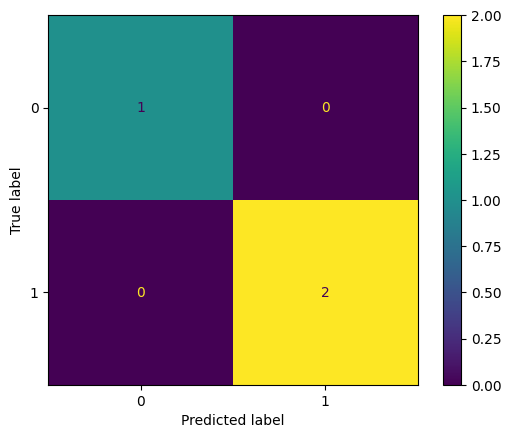

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Graficamos el arbol

In [45]:
c = ["IncomeRange","CreditCardIns","Gender","Age"]
clase = ["No compra el seguro", "Compra el seguro"]

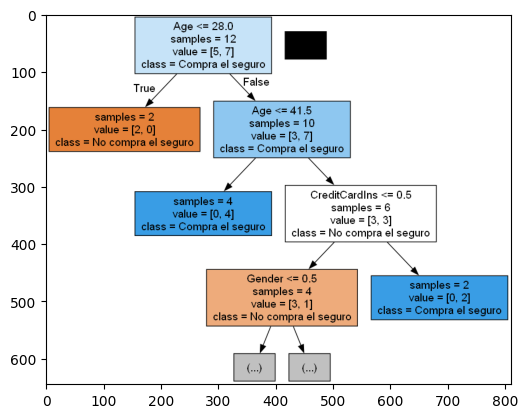

In [46]:
info = tree.export_graphviz(modelo, feature_names=c, class_names=clase, filled=True, impurity=False, max_depth=3)
grafico = pydotplus.graph_from_dot_data(info)
grafico.write_png("1.png")
imagen = plt.imread("1.png")
plt.imshow(imagen);

Aplicamos el criterio de Emtropia

In [47]:
modelo1 = DecisionTreeClassifier(criterion='entropy', random_state=0)
modelo1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Sacamos el score y la matriz de confusion

In [48]:
y_pred = modelo1.predict(x_test)
score = modelo1.score(x_train, y_train)
score

1.0

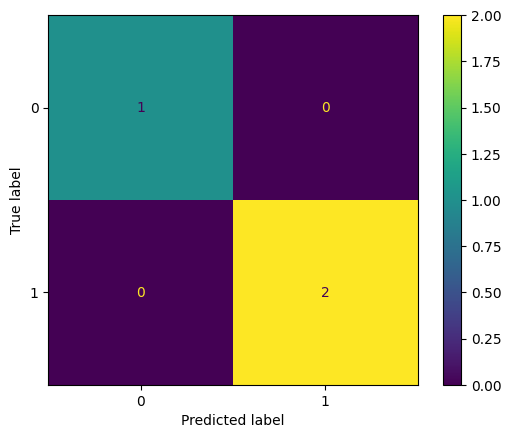

In [49]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Graficamos el arbol

In [50]:
c = ["MagazinePromo","WatchPromo","Gender","Age"]
clase = ["No compra el seguro", "Compra el seguro"]

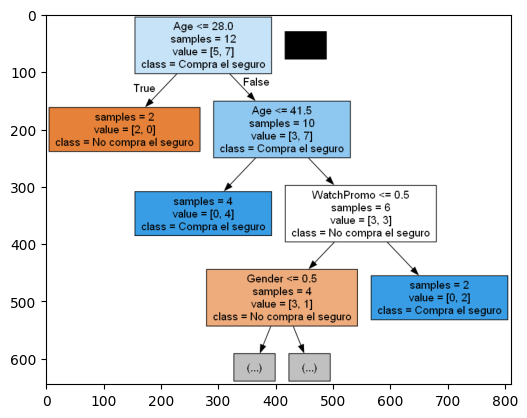

In [51]:
info = tree.export_graphviz(modelo, feature_names=c, class_names=clase, filled=True, impurity=False, max_depth=3)
grafico = pydotplus.graph_from_dot_data(info)
grafico.write_png("2.png")
imagen = plt.imread("2.png")
plt.imshow(imagen);

Al comparar los 2 criterios se puede observar que el resultado es el mismo y para este ejercicio el usar emtropia o impureza nos lleva a un resulado igual, siendo estos 2 muy buenos para determinar si la persona compra o no el seguro de vida

# Pregunta 3

In [52]:
x = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 
     0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 
     0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 
     0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
     0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 
     0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 
     1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 
     0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 
     1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 
     0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
     0, 0, 0, 0, 1, 0, 0, 0, 1, 1]

y = [41, 53, 54, 47, 57, 51, 42, 45, 54, 52, 51, 51, 71, 57, 50, 43, 51, 60, 62, 57, 35, 75, 45, 57, 45, 46, 66, 57, 49, 49, 57, 64, 63, 57, 50, 58, 75, 68, 44, 40, 41, 62, 57, 43, 48, 63, 39, 70, 63, 59, 61, 38, 61, 49, 73, 44, 42, 39, 55, 52, 45, 61, 39, 41, 50, 40, 60, 47, 59, 49, 46, 58, 71, 58, 46, 43, 54, 56, 46, 54, 57, 54, 71, 48, 40, 64, 51, 39, 40, 61, 66, 49, 65, 52, 46, 61, 72, 71, 40, 69, 64, 56, 49, 54, 53, 66, 67, 40, 46, 69, 40, 41, 57, 58, 57, 37, 55, 62, 64, 40, 50, 46, 53, 52, 45, 56, 45, 54, 56, 41, 54, 72, 56, 47, 49, 60, 54, 55, 33, 49, 43, 50, 52, 48, 58, 43, 41, 43, 46, 44, 43, 61, 40, 49, 56, 61, 50, 51, 42, 67, 53, 50, 51, 72, 48, 40, 53, 39, 63, 51, 45, 39, 42, 62, 44, 65, 63, 54, 45, 60, 49, 48, 57, 55, 66, 64, 55, 42, 56, 53, 41, 42, 53, 42, 60, 52, 38, 57, 58, 65]

In [53]:
df = pd.DataFrame({
    'xm': x,
    'ym': y
})

In [54]:
x = df[["ym"]]
y = df[["xm"]]

In [55]:
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [56]:
regre = LinearRegression()
regre.fit(x, y)
escare = regre.score(x, y)
escare

0.013499443414130896

In [57]:
coef = regre.coef_[0]
intercept = regre.intercept_
print("Pendiente:", coef)
print("Intersección:", intercept)


Pendiente: [0.00534731]
Intersección: [-0.03650907]


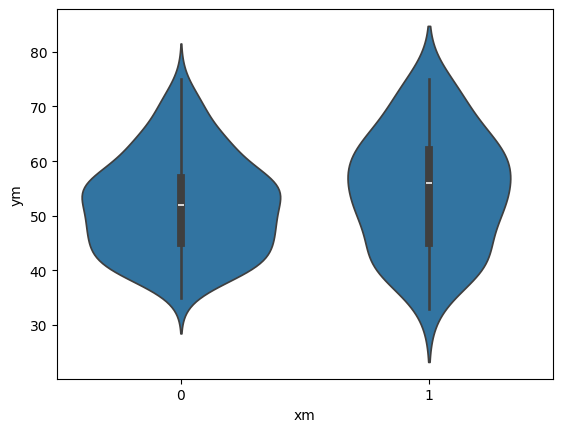

In [58]:
sns.violinplot(x='xm', y='ym', data=df);

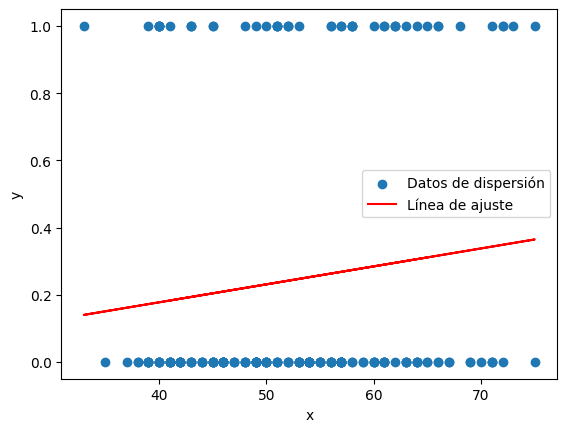

In [59]:
y_pred = regre.predict(x)

plt.scatter(x, y, label='Datos de dispersión')
plt.plot(x, y_pred, color='red', label='Línea de ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

0.18247794045447116


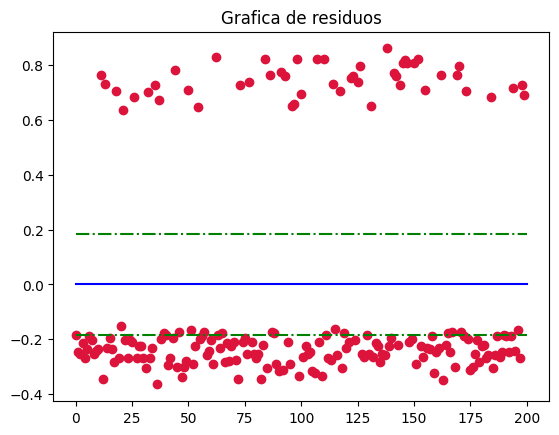

In [60]:
x1=np.arange(len(y_pred))
plt.scatter(x1, (y-y_pred),c='crimson')
plt.plot([0,len(y_pred)],[0,0], 'b-')
plt.title('Grafica de residuos')
error= mean_squared_error(y, y_pred)
print(error)
plt.plot([0,len(y_pred)],[error,error],'g-.')
plt.plot([0,len(y_pred)],[-error,-error],'g-.')

Aplicamos OSL

In [61]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [62]:
ols_datos = x_train.join(y_train)
regre1 = smf.ols(formula = 'xm ~ ym', data = ols_datos)
regre1 = regre1.fit()
regre1.summary()

PatsyError: Error evaluating factor: NameError: name 'xm' is not defined
    xm ~ ym
    ^^

In [ ]:
ols_residuos = regre1.resid
ols_predict = regre1.predict(ols_datos)

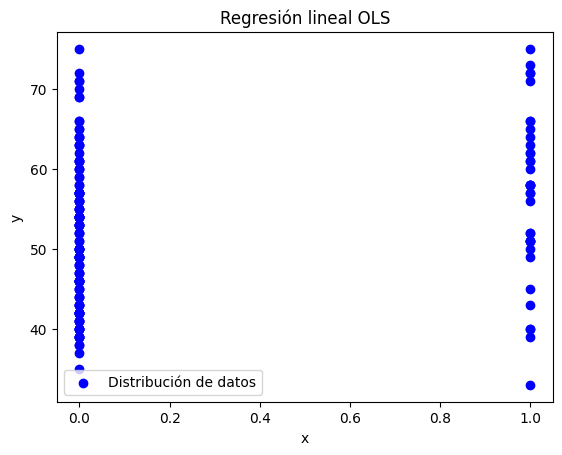

In [ ]:
plt.scatter(ols_datos['xm'], ols_datos['ym'], color='blue', label='Distribución de datos')
#plt.plot(ols_datos['xm'], ols_predict, color='red', label='Línea de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal OLS')
plt.legend()
plt.show()

0.16549412101882424


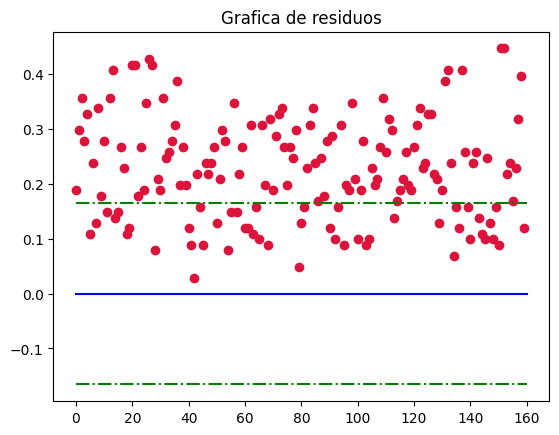

In [ ]:
x1=np.arange(len(ols_predict))
plt.scatter(x1, ols_predict,c='crimson')
plt.plot([0,len(ols_predict)],[0,0], 'b-')
plt.title('Grafica de residuos')
error= mean_squared_error(regre1.model.endog ,ols_predict)
print(error)
plt.plot([0,len(ols_predict)],[error,error],'g-.')
plt.plot([0,len(ols_predict)],[-error,-error],'g-.')

En los 2 casos tenemos los mismos resultados por lo tanto en este caso se podria ocupar cualquier modelo para que el resultado es el mismo

Ahora probamos con Logistica Regresion

In [ ]:
lg = LinearRegression()
lg.fit(x_train, y_train)
escare = lg.score(x_train, y_train)
escare

0.05092977193505821

In [ ]:
coef = lg.coef_[0]
intercept = lg.intercept_
print("Pendiente:", coef)
print("Intersección:", intercept)

Pendiente: [0.00992104]
Intersección: [-0.29827274]


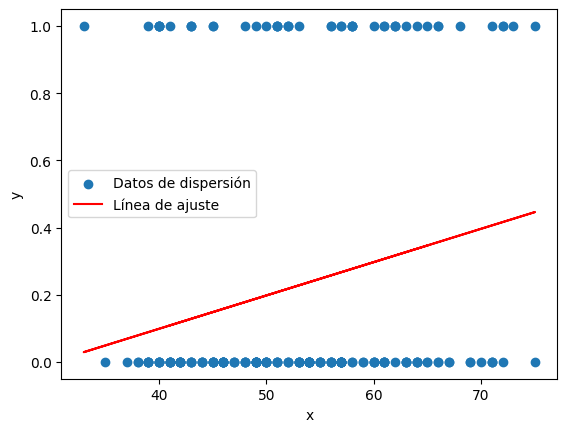

In [ ]:
y_pred = lg.predict(x)

plt.scatter(x, y, label='Datos de dispersión')
plt.plot(x, y_pred, color='red', label='Línea de ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

0.1847449228911071


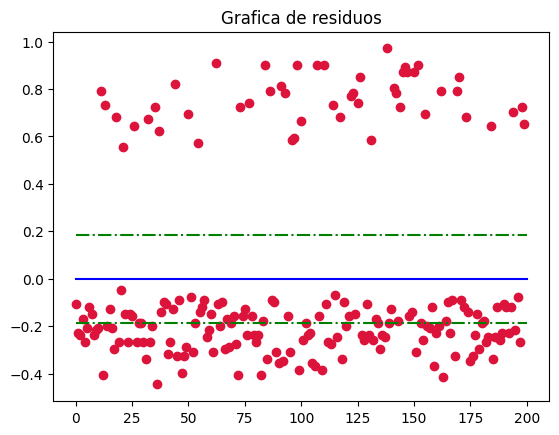

In [ ]:
x1=np.arange(len(y_pred))
plt.scatter(x1, (y-y_pred),c='crimson')
plt.plot([0,len(y_pred)],[0,0], 'b-')
plt.title('Grafica de residuos')
error= mean_squared_error(y, y_pred)
print(error)
plt.plot([0,len(y_pred)],[error,error],'g-.')
plt.plot([0,len(y_pred)],[-error,-error],'g-.')